# Carbon NanoTube Example

In [1]:
import csv
import mysql.connector as connection

## Reading Carbon Nonotube raw dataset

In [2]:
# Adjusting data into columns (Total 8 columns)
# Splitting the data with delimiters

file=[]
with open("carbon_nanotubes.csv",'r') as f:
    data=csv.reader(f,delimiter="\n")
    for i in data:
        file.append(i[0].split(';'))

## Writing the updated data in csv file

In [4]:
with open('nanotube_updatedfile.csv','w',newline='') as data:
    writer=csv.writer(data)
    writer.writerows(file)

## Creating a database in MySQL

In [5]:
try:
    conn=connection.connect(host='localhost',user='root',passwd='Mysql@102',use_pure=True)
    print(conn.is_connected())
    cur=conn.cursor()
    cur.execute("create database carbonnanotube")
    print("Database created!!")
except Exception as e:
    conn.close()
    print(str(e))

True
Database created!!


## Creating a table

In [6]:
query="create table carbonnanotube.NanotubeDetails (Chiral_indice_n int, Chiral_indice_m varchar(20), Initial_atomic_coordinate_u varchar(20), Initial_atomic_coordinate_v varchar(20), Initial_atomic_coordinate_w varchar(20), Calculated_atomic_coordinates_u varchar(20), Calculated_atomic_coordinates_v varchar(20), Calculated_atomic_coordinates_w varchar(20))"
cur=conn.cursor()
cur.execute(query)
print("Table created!!")

Table created!!


## Inserting data into table

In [8]:
with open ("nanotube_updatedfile.csv", 'r') as f:
    data_csv=csv.reader(f,delimiter='\n')
    next(data_csv)
    print(data_csv)
    for i in data_csv:
        cur.execute("insert into carbonnanotube.NanotubeDetails values ({})".format(', '.join([val for val in i])))
conn.commit()
print("Values inserted!!")

Values inserted!!


## Output: 

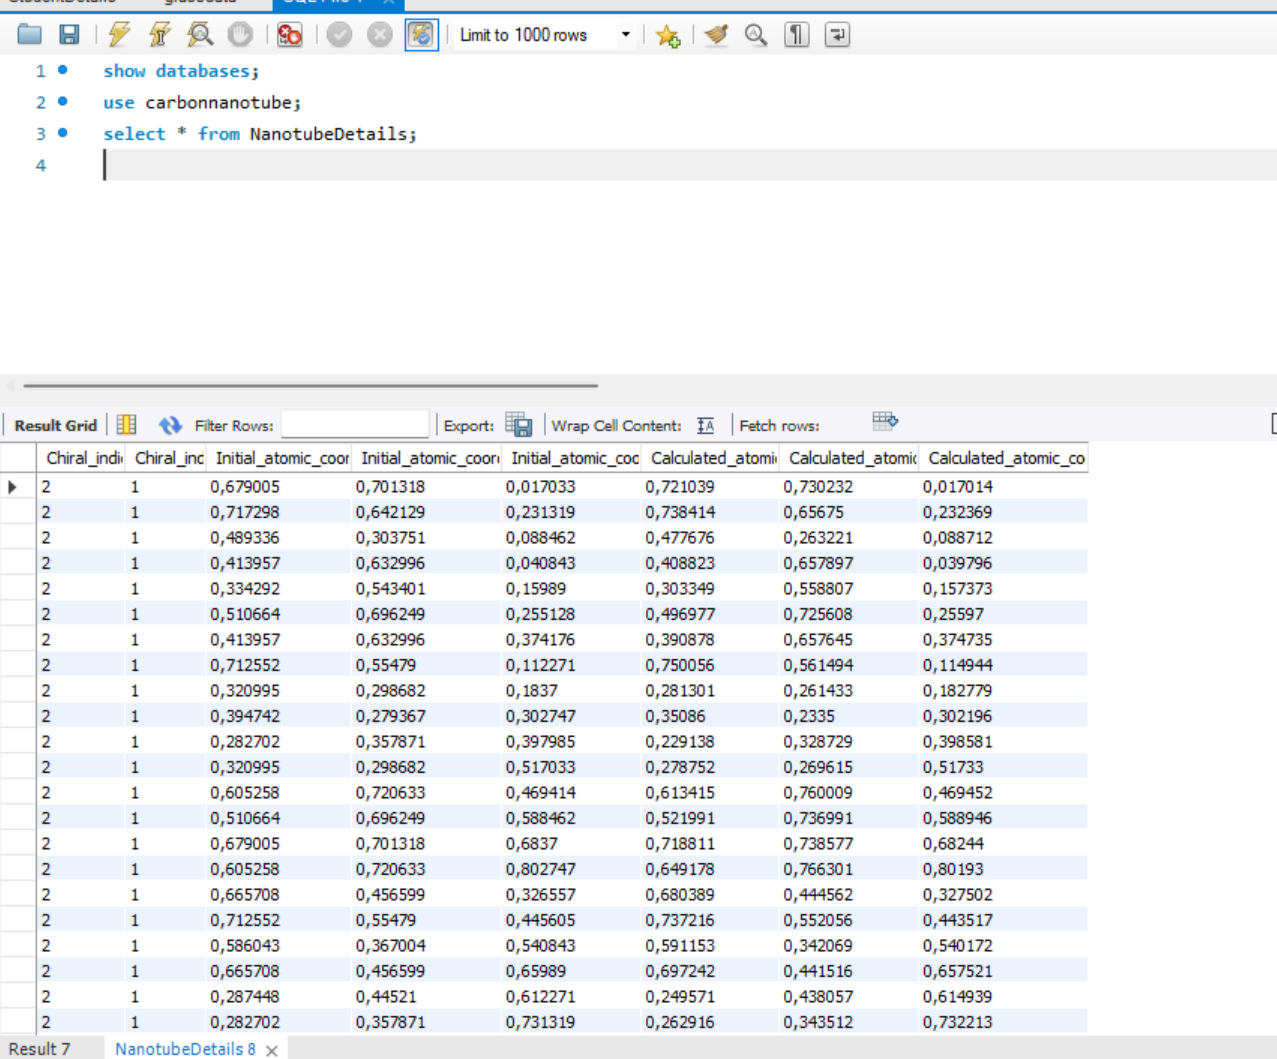